(sec:numpy_5)=
# 실전 예제: 붓꽃 데이터 분석

**주요 내용**

- 예제: 그래프 배경색칠
- 예제: 붓꽃 데이터셋 분석

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [21]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [22]:
# 파이플롯
import matplotlib.pyplot as plt

# # 도표 크기 지정
# plt.rc('figure', figsize=(10, 6))

## 목표

최종적으로 아래와 같은 산점도를 그리려 한다.
각각의 점들은 붓꽃(아이리스) 데이터셋에 포함된 150개의 데이터 샘플을 세 개의 품종에 따라 다른 색깔과 모양으로 보여준다.
또한 품종을 구분하는 두 개의 직선을 경계로 배경색을 달리한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris-classification1.png" style="width:90%;"></div></p>

먼저 배경을 색칠하는 방법을 알아본다.

## 그래프 배경 색칠

그래프 배경으르 그리는 방법은 아래와 같은 격자 무늬에 사용되는 점들을
2차원 어레이를 이용하여 사람의 눈으로 구분할 수 없을 정도로 촘촘하게 그리는 것이다.

### 2차원 격자 어레이

아래 모양의 회색 격자무늬를 그리기 위해 필요한 2차원 어레이를 생성하고자 한다.
각 점의 좌표는 -1과 1사이의 값을 10개의 구간으로 균등하게 나눈 값들이다.
즉, 가로 세로 모두 11개의 점으로 구성된다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/meshgrid10x10.png" style="width:350px;"></div>

먼저 `np.arange()` 함수를 이용하여 -1와 1 사이의 구간을 10개의 구간으로 균등하게
나누는 어레이를 생성하려면
아래에서 처럼 -1에서 1.01 이전까지 0.2 스텝으로 증가하는 값들로 이루어진 어레이를 생성하면 된다.

In [23]:
points = np.arange(-1, 1.01, 0.2)

points

array([-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

**`np.meshgrid()` 함수**

예를 들어 `matplotlib.pyplot` 모듈의 `scatter()` 함수를 이용하여 위 그림에 있는 총 121(= 11 $\times$ 11)개의 점을
산점도로 그리려면 각각 121개의 x-좌표와 y-좌표를 담은 두 개의 리스트가 필요하다.
`np.meshgrid()` 함수를 이용하면 손쉽게 두 리스트를 구할 수 있다.

`np.meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 그릴 수 있는 격자무늬의
x-좌표 리스트와 y-좌표 리스트를 생성하며
아래와 같이 실행한다.

In [24]:
xs, ys = np.meshgrid(points, points)

`xs`는 행별x-좌표를 2차원 어레이로 담고 있다.
행별로 x-좌표는 작은 값에서 큰 값으로,
행의 순서 또한 작은 값에서 큰 값으로 변한다.

In [25]:
xs

array([[-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ]])

`ys`는 행별 y-좌표를 2차원 어레이로 담고 있다.
행별로 x-좌표는 작은 값에서 큰 값으로,
행의 순서 또한 작은 값에서 큰 값으로 변한다.

In [26]:
ys

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],
       [-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2],
       [-0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4],
       [ 0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

xs와 ys를 이용하여 산점도를 그리면 원하는 격자무늬가 얻어진다.

- `c='darkgray'` 또는 `color='darkgray'`: 산점도에 사용되는 점들의 색상 지정.
    여기서는 darkgray 사용.
    보다 다양한 색상 정보는 [Matplotlib Scatter](https://www.w3schools.com/python/matplotlib_scatter.asp) 참고.

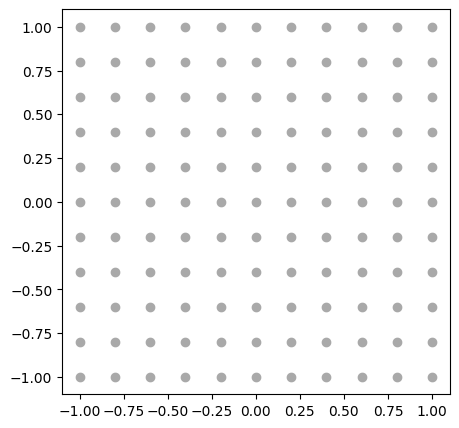

In [27]:
# 도표 크기 지정
plt.rc('figure', figsize=(5, 5))

# 산점도 그리기
plt.scatter(xs, ys, c='darkgray')
plt.show()

### 배경색칠

예를 들어 회색 배경을 얻고자 한다면 보다 점을 보다 촘촘히 찍으면 된다.
예를 들어, -1부터 1사이의 구간은 0.02 크기로 총 100개의 구간으로 구성한 다음에 동일한 그래프를 그리면 훨씬 더
섬세한 사진을 얻는다.

In [28]:
points = np.arange(-1, 1.01, 0.02)

`meshgrid()` 함수를 이용하여 메쉬 생성에 필요한 x 좌표와 y 좌표 모음을 만든다.

In [29]:
xs, ys = np.meshgrid(points, points)

`xs` 와 `ys` 각각 (101, 101) 모양의 2차원 어레이다.

In [30]:
xs.shape

(101, 101)

In [31]:
ys.shape

(101, 101)

xs와 ys를 이용하여 산점도를 그리면 한 장의 회색 색종이를 얻는다.
이유는 픽셀이 촘촘하기 때문이다.

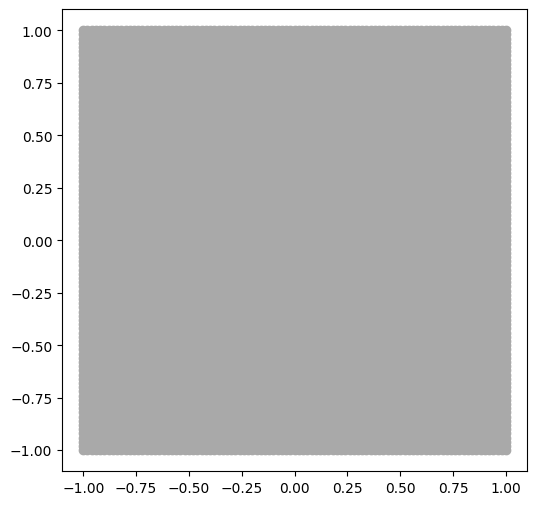

In [32]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys, c='darkgray')
plt.show()

배경색은 `c`의 키워드 인자를 변경하면 된다.
예를 들어, 연노랑 배경을 원하면 `c='lightyello'` 옵션을 지정한다.

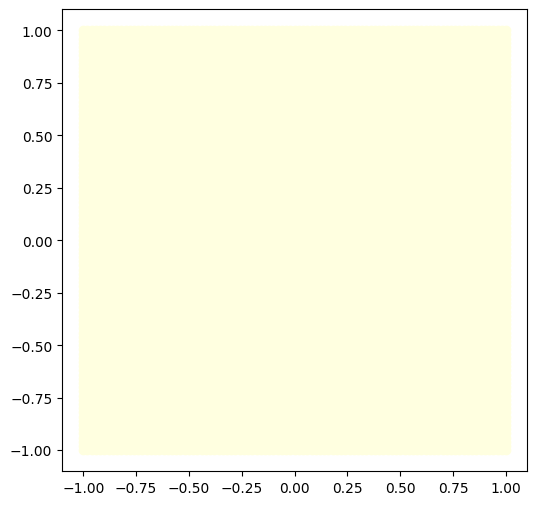

In [33]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys, c='lightyellow')
plt.show()

### 등고선

등고선 기능을 이용하여 배경색을 구역에 따라 다르게 할 수 있다.
등고선을 그리려면 먼저 배경을 포함되는 각각의 점의 좌표에 따라
값을 달리하는 방법을 지정해야 한다.

예를 들어 원점으로부터 멀어질 수록 색을 달리하는 등고선을 그리기 위해
`xs`와 `ys`에 대해 원의 방정식을 적용한다.
참고로 원점을 중심으로 하고, 반지름이 $r$인 원에 포함되는 점들의 좌표 $(x, y)$는 다음 방정식을 만족해야 한다.

$$
x^2 + y^2 = r^2
$$

따라서 $\sqrt{x^2 + y^2}$의 값에 따라 해당 점이 원점으로부터의 거리를 가리키며,
이 성질을 이용하여 배경에 사용되는 각 점의 원점으로부터의 거리에 따라 배경색을 달리할 수 있다.

아래 코드가 배경에 사용되는 각각의 점에 대해 원점으로부터의 거리를 계산한다.

In [34]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [35]:
z.shape

(101, 101)

이제 `plt.contour()` 함수를 `z` 값을 기준으로 등고선을 흑백사진으로 그리게 하면 다음과 같다.

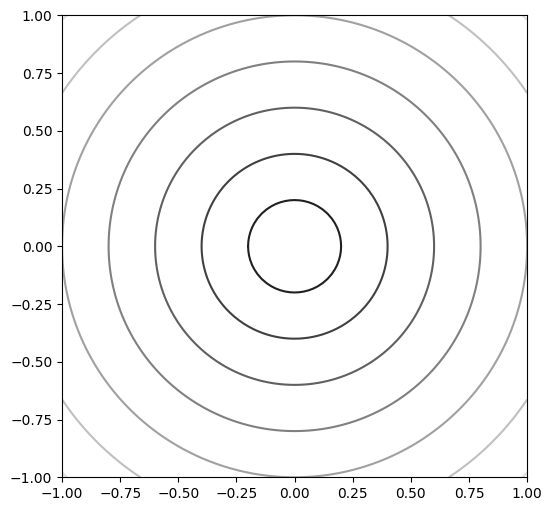

In [36]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(6, 6))

plt.contour(xs, ys, z, cmap='gray')

plt.show()

`plt.contourf()` 함수는 등고선에 의해 구분된 영역을 `z` 값에 따른 색을 칠한다.

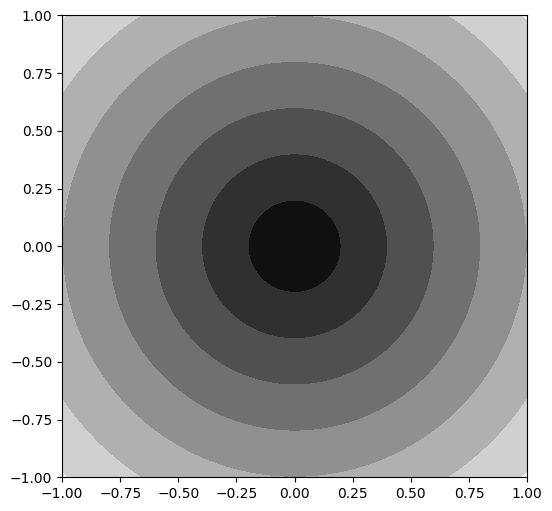

In [37]:
plt.rc('figure', figsize=(6, 6))

plt.contourf(xs, ys, z, cmap='gray')

plt.show()

다양한 [색지도](https://matplotlib.org/stable/tutorials/colors/colormaps.html)를
이용하여 자신만의 색상으로 배경을 색칠할 수 있다.
아래 코드는 예를 들어 파스텔 색지도인 `Pastel1`을 이용한다.

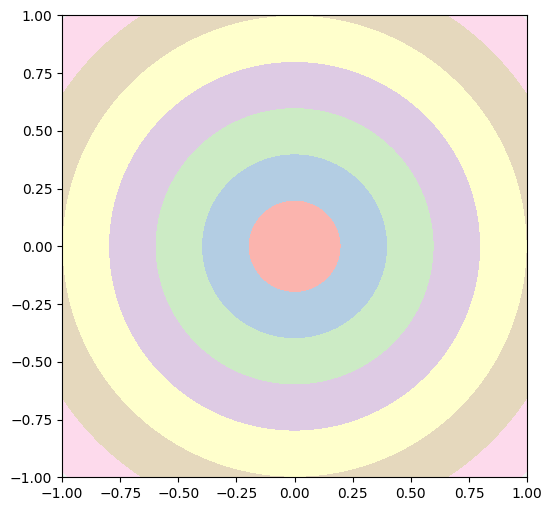

In [38]:
plt.rc('figure', figsize=(6, 6))

plt.contourf(xs, ys, z, cmap='Pastel1')

plt.show()

## 붓꽃 데이터 분석

### 데이터셋 불러오기

붓꽃(아이리스) 데이터를 이용하여 활용법을 살펴 보기 위해
먼저 데이터를 인터넷 상에서 가져온다.

In [39]:
url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/data/iris_nan.data'
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

위 주소의 `iris.data` 파일을 `data`라는 하위 디렉토리에 저장한다.

In [40]:
from pathlib import Path
import urllib.request

data_path = Path() / "data"
data_path.mkdir(parents=True, exist_ok=True)
urllib.request.urlretrieve(url, data_path / 'iris.data')

(PosixPath('data/iris.data'), <http.client.HTTPMessage at 0x10f50b580>)

다운로드된 `iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다.

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

이 중에 마지막 품종 특성은 문자열이고 나머지 특성은 부동소수점, 즉 수치형 데이터이다.
아래 사진은 붓꽃의 꽃받침<font size='2'>sepal</font>과 꽃잎<font size='2'>petal</font>의 길이와 너비를 측정하는 방법을 보여준다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris_petal-sepal.png" style="width:450px;"></div></p>

여기서는 연습을 위해 수치형 데이터를 담고 있는 네 개의 특성만 가져온다.

* `genfromtxt()` 함수: 인터넷 또는 컴퓨터에 파일로 저장된 데이터를 적절한 모양의 어레이로 불러오는 함수
* `delimiter=','`: 쉼표를 특성값들을 구분하는 기준으로 지정
* `dtype='float'`: 어레이의 항목을 부동소수점으로 지정
* `usecols=[0,1,2,3]`: 리스트에 지정된 인덱스의 특성만 가져오기

In [41]:
iris_features = np.genfromtxt(data_path / 'iris.data', delimiter=',', dtype='float', usecols=[0,1,2,3])

어레이의 모양은 (150, 4)이다.

In [42]:
iris_features.shape

(150, 4)

처음 5개 샘플은 다음과 같다.

In [43]:
iris_features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 결측치 처리

붓꽃 데이터셋 안에 결측치가 포함되어 있다.
결측치가 있는지 여부를 다음과 같이 확인한다.

- `np.isnan()` 함수: 어레이의 각각의 항목이 결측치인지 여부를 확인하는 부울 어레이 반환
- `any()` 어레이 메서드: 부울 어레이의 항목에 `True`가 하나라도 포함되어 있는지 여부 확인

In [44]:
np.isnan(iris_features).any()

np.True_

결측치가 특정 열에만 있는지를 확인하려면 축을 0으로 지정한다.

In [45]:
np.isnan(iris_features).any(axis=0)

array([False, False, False,  True])

3번 열에만 결측치가 있음이 확인됐다.

`sum()` 함수를 이용하여 3개의 결측치가 있음을 바로 확인할 수 있다.

* `sum()` 어레이 메서드: `True`는 1, `False`는 0으로 처리한다.

In [46]:
np.isnan(iris_features).sum()

np.int64(3)

3번 열에만 결측치가 있기에 아래와 같이 결측치의 수를 확인할 수도 있다.

In [47]:
np.isnan(iris_features[:, 3]).sum()

np.int64(3)

부울 인덱싱을 활용하여 결측치가 없는 행만 추출할 수 있으며,
결측치를 포함한 데이터 샘플 3개는 다음과 같다.

In [48]:
mask = np.isnan(iris_features[:, 3])

iris_features[mask]

array([[5.4, 3.4, 1.7, nan],
       [5. , 3.2, 1.2, nan],
       [4.4, 3.2, 1.3, nan]])

`nan`은 결측치를 의미하는 값인 `np.nan`을 가리키는 기호다.

In [49]:
np.nan

nan

원본 `iris_nan.data` 파일에서 결측치는 아래와 같이 그냥 비워져 있다.

```
5.4, 3.4, 1.7,, Iris-setosa
5. , 3.2, 1.2,, Iris-setosa
4.4, 3.2, 1.3,, Iris-setosa
```

그런데 3개의 결측치는 사실 일부러 만들어졌고 원래 모두 0.2였다.
부울 인덱싱을 이용하여 결측치를 모두 0.2로 원상회복 시킨다.

In [50]:
iris_features[:, 3][mask] = 0.2

결측치가 없음을 다음과 같이 확인한다.

In [51]:
np.isnan(iris_features).any()

np.False_

**품종 정보**

iris_features 데이터셋에 사용된 붓꽃들의 품종은 아래 세 개이다.

```
'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
```

이 사실을 데이터셋에서 직접 확인할 수 있다.

- `usecols=4`: 품종 정보를 담고 있는 열만 가져오기
- `dtype='str`: 문자열로 처리

In [52]:
iris_labels = np.genfromtxt(data_path / 'iris.data', delimiter=',', dtype='str', usecols=4)

길이가 150인 1차원 어레이로 가져온다.

In [53]:
iris_labels.shape

(150,)

사용되는 품종이 3가지임을 `np.unique()` 함수를 이용해서 확인한다.

In [54]:
varieties = np.unique(iris_labels)
varieties

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

품종별로 각각 50개의 샘플이 포함된다.

In [55]:
for variety in varieties:
    count = np.count_nonzero(iris_labels == variety)
    print(f"{variety:<15} 샘플 수: {count}")

Iris-setosa     샘플 수: 50
Iris-versicolor 샘플 수: 50
Iris-virginica  샘플 수: 50


### 산점도 그리기

꽃잎의 길이(2번 열)와 너비 정보(3번 열)를 이용하여 산점도를 그린다.
먼저 꽃잎 길이를 x-좌표값으로, 꽃잎 너비를 y-좌표 값으로 지정한다.
이때 모든 x-좌표와 모든 y-좌표를 따로따로 지정한다.

In [56]:
X = iris_features[:, 2] # 꽃잎 길이
Y = iris_features[:, 3] # 꽃잎 너비

`plt.plot()` 함수를 이용하여 산점도를 그릴 수 있다.

- 셋째 인자: `"bo"` 는 점의 색깔과 모양 지정. `b` 는 blue(파랑)를, `o` 는 동그라미 모양의 점.
- `plt.plot(X, Y, "bo")`는 `plt.plot(X, Y, color='blue', marker='o', linesty;e='')`를 줄인 표현
- `plt.axis([0.5, 7, 0, 3])`: x-축 구간은 0.5부터 7, y-축 구간은 0부터 3.

(np.float64(0.5), np.float64(7.0), np.float64(0.0), np.float64(3.0))

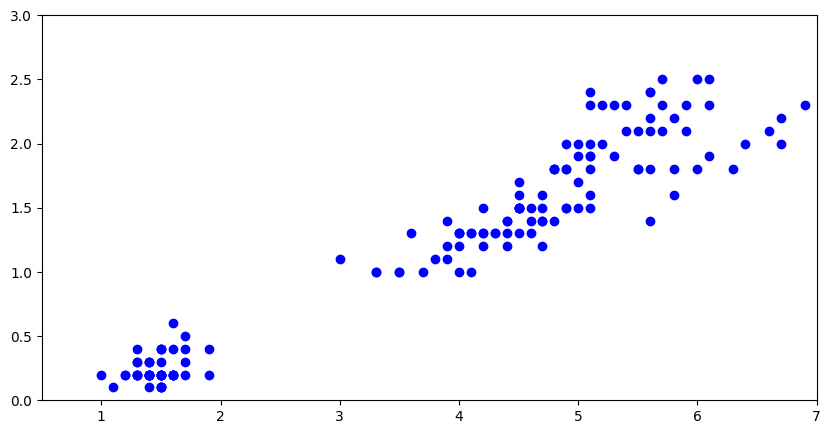

In [57]:
plt.figure(figsize=(10, 5))

plt.plot(X, Y, 'bo')
# plt.plot(X, Y, color='blue', marker='o', linestyle='')

plt.axis([0.5, 7, 0, 3])

그런데 이렇게 하면 품종이 구별되지 않기에 품종 정보를 함께 활용해야 한다.
예를 들어 세토사 품종 50개의 꽆잎의 길이는 다음과 같이 부울 마스크를 이용해서 구할 수 있다.

- `plt.xlabel("Petal length")`: x-축 레이블 지정
- `plt.ylabel("Petal width")`: y-축 레이블 지정
- `plt.legend(loc="center left")`: 범례 위치 지정
- `plt.show()`: 여러 개의 그래프를 동시에 하나의 캔버스에 그리도록 함

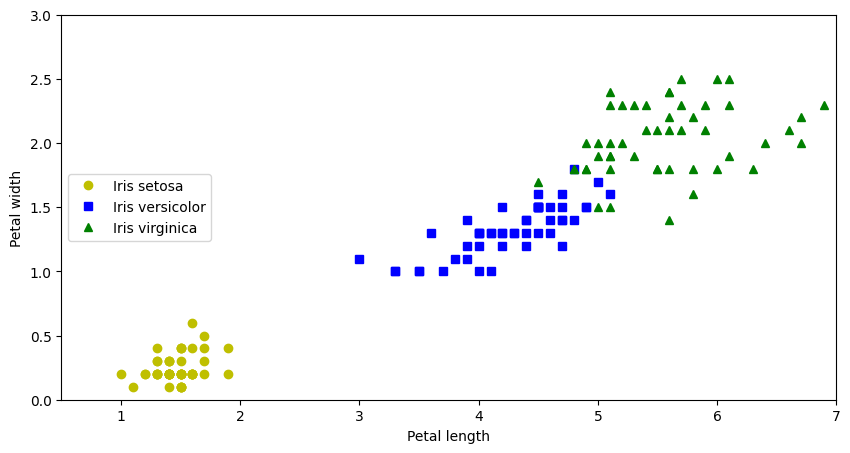

In [58]:
plt.figure(figsize=(10, 5))

# 세토사 품종 산점도: 노랑 동그라미
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'yo', label='Iris setosa')
# 버시컬러 품종 산점도: 파랑 네모
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'bs', label='Iris versicolor')
# 버지니카 품종 산점도: 초록 세모
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'g^',  label='Iris virginica')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")

plt.axis([0.5, 7, 0, 3.])
plt.show()

**격자 무늬**

격자 무늬 배경도 넣을 수 있다.

- `plt.grid()`: 격차 무늬 배경 추가

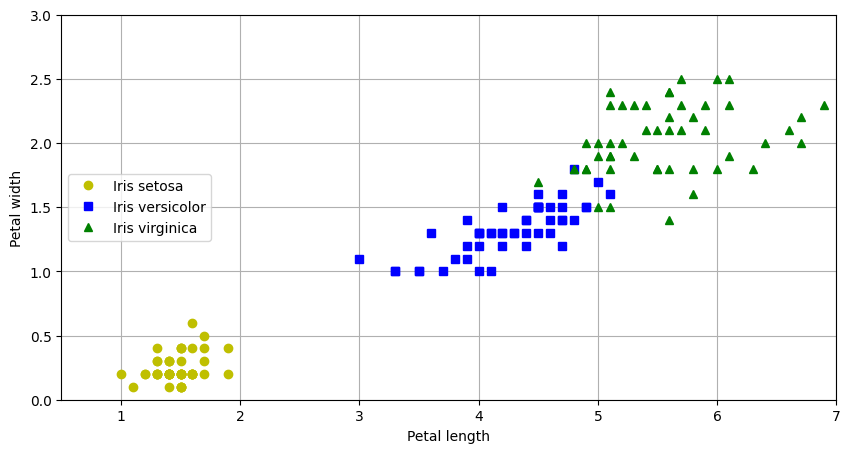

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'yo', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'bs', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'g^',  label='Iris virginica')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")

plt.axis([0.5, 7, 0, 3.])

plt.grid()
plt.show()

### 배경 색칠

`meshgrid()` 함수를 이용하여 배경의 색을 지정할 수 있다.

In [60]:
points_x = np.arange(0, 7.01, 0.02)
points_y = np.arange(0, 3.51, 0.02)
xs, ys = np.meshgrid(points_x, points_y)

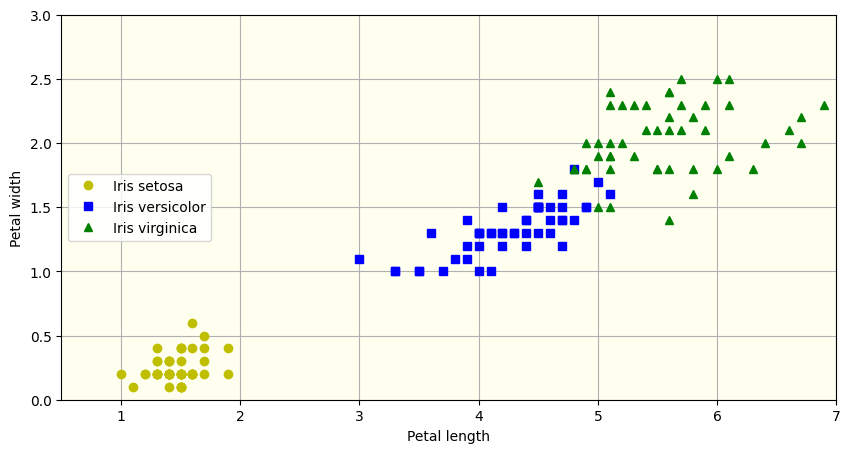

In [61]:
plt.figure(figsize=(10, 5))

# 배경
plt.scatter(xs, ys, c= 'ivory') # 아이보리색

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'yo', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'bs', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'g^',  label='Iris virginica')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")

plt.axis([0.5, 7, 0, 3.])

plt.grid()
plt.show()

### 등고선과 품종 분류

품종의 분류를 색으로 구분하기 위해 `plt.contour()` 함수 또는 `plt.contourf()` 를 이용한다.
적절한 등고선을 그리기 위해 `meshgrid()` 함수가 생성한 각 좌표에 해당하는 지점의
값을 담고 있는 어레이 `Z`를 생성한다.
단 x-좌표의 값에 따라 0, 1, 2를 항목으로 갖도록 한다.

- 0: x-좌표가 2.5보다 작은 경우
- 1: x-좌표가 2.5보다 같거나 크고 5보다 작은 경우
- 2: x-좌표가 5보다 같거나 큰 경우

먼저 `xs`, `ys`와 동일한 모양을 갖는 0-행렬로 `Z`를 생성한다.

In [62]:
Z = np.zeros(xs.shape)

이제 배경에 포함된 점들의 x-좌표값이 2.5와 5를 기준으로 `Z`의 항목에 해당하는 값을 각각 1과 2로 변경한다.
아래 코드는 부울 마스크를 이용하여 이 과정을 처리한다.

In [63]:
Z[(2.5 <= xs) & (xs < 5)] = 1
Z[(5. <= xs)] = 2

In [64]:
Z

array([[0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.]])

아래 코드는 다른 색의 등고선을 이용하여 자연스럽게 품종을 구분하는 배경과 함께 산점도를 그린다.
배경을 먼저 그린 다음에 산점도를 그림에 주의한다.

- `plt.contourf(xs, ys, Z, alpha=0.3, cmap='Wistia')`: 색으로 등고선 구분.
- `alpha=0.3`: 투명도를 0.3으로 지정. 0에서 1사이의 값이며 클 수록 불투명해짐
- `cmap='Wistia`: 등고선에 사용할 [색 지도](https://matplotlib.org/stable/tutorials/colors/colormaps.html) 지정

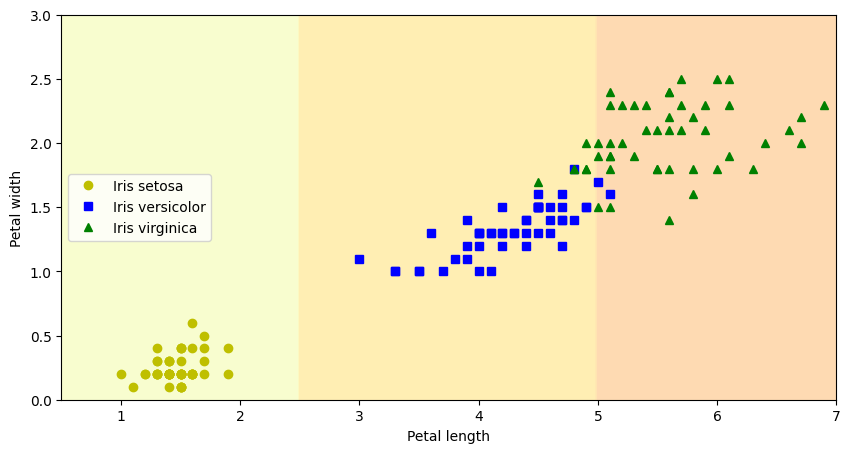

In [65]:
plt.figure(figsize=(10, 5))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.3, cmap='Wistia')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'yo', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'bs', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'g^',  label='Iris virginica')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7.0, 0, 3])

# plt.grid()
plt.show()

## 연습문제

참고: [(실습) 실전 예제: 어레이 활용](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-numpy_5.ipynb)